In [ ]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import simpson

k=7.6695
G= 4.302e-6

def rho_bulge(r, a_b, sig_b):
    if r <= 0:
        raise ValueError(f"Invalid radius r={r} passed to rho_bulge()")
    theta= np.linspace(1e-6, np.pi /2, 401)                                                           # obtained after substitutions
    integrand_val= (np.sin(theta)**0.75) * np.exp(-k * ((r/(np.sin(theta) * a_b))**0.25 - 1))/(r**1.75)
    # x_val= np.linspace( 0, np.pi/2, 201)
    integral = simpson(integrand_val, theta)
    rho_val = ((k * sig_b) / (4 * np.pi * (a_b**0.25))) * integral
    return rho_val

def v_bulge(r,a_b, sig_b):
    if r <= 0:
        return 0.0
    x_val= np.linspace(1e-6, r, 401)
    rho_vals = np.array([rho_bulge(x, a_b, sig_b) for x in x_val])
    integrand_val= 4 * np.pi * x_val**2 * rho_vals
    mass = simpson(integrand_val ,x_val )   # avoid x=0 singularity
    return np.sqrt(G*mass/r)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv , gamma, gammainc
from scipy.integrate import simpson

k=7.6695
G= 4.302e-6

# ( why twice)# HALO
# # fv_h_nfw= lambda r, rho, h: G*4*np.pi*(rho*h*h*h/r)* [np.log(1+(r/h))- ((r/h)/(1+ (r/h)))]
# #fv_h_nfw= lambda r, rho ,h : (G/r)*(4*np.pi*rho*h**3)* (np.log(1+(r/h))- ((r/h)/(1+ (r/h))))
# #fv_h_hrn= lambda r, rho, h:  G*2*np.pi*rho*h*r/(1+ (r/h))**2
# # fv_h_ens= lambda r, rho, h: G*4*np.pi*rho*0.041*(h**3/r)*[ gammainc( 3*0.041, (r/h)**(1/0.041))]
# # fv_h_ens= lambda r, rho, h, n : G*4*np.pi*rho*n*(h**3/r)*(gammainc( 3*n, (r/h)**(1/n)))
# def vh_nfw(r, rho, h):
#     if r <= 0:
#         return 0.0
#     v2= (G/r)*(4*np.pi*rho*h**3)* (np.log(1+(r/h))- ((r/h)/(1+ (r/h))))
#     if v2>0:
#         return np.sqrt(v2)
#     return 0.0

# rs = np.linspace(0.01, 100, 1000)

In [15]:
def sigbr_x(x, a_b, sig_b):
    return sig_b * np.exp(-k * ((x / a_b)**0.25 - 1))

def rho_bulge(r, a_b, sig_b):
    u_val= np.linspace(1e-6, 20, 201)  
    integrand= sigbr_x( r*np.cosh(u_val), sig_b, a_b)/ (r * np.cosh( u_val))
    integ_val= simpson(integrand, u_val)
    final= ( (-k)/( 4*a_b**0.25)) * integ_val
    return final

def v_bulge(r, a_b, sig_b):
    x_val = np.linspace(1e-3, r, 201)
    rho_vals = np.array([rho_bulge(x, a_b, sig_b) for x in x_val])
    integrand = 4 * np.pi * x_val**2 * rho_vals
    mass = simpson(integrand, x_val)
    return np.sqrt((G* mass/r ))

In [16]:
def v_disk(r,a_d, sig_d):
    y=r/(2*a_d)
    v2= np.pi * G * sig_d * (r**2 /a_d) * ( (iv(0,y)*kv(0,y)) - (iv(1,y)*kv(1,y)) )
    if v2>0:
        return np.sqrt(v2)
    return 0.0

In [17]:
def v_halo(r, rho_0, h, n):
    mass= 4* np.pi* rho_0* n* h**3* gamma(3*n) * gammainc(3*n, (r/h)**(1/n))
    v2= G*mass/r
    if v2>=0:
        return np.sqrt(v2)
    return 0.0


In [ ]:
rs = np.linspace(0.01, 100, 10000)
import pandas as pd, matplotlib.pyplot as plt, numpy as np
data= pd.read_csv("mw_r_v_sd.2", delim_whitespace=True, header=None, names=['r', 'v', 'std'])
xl=data['r']
yl=data['v']
el=data['std']

/tmp/ipykernel_671/1605074568.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data= pd.read_csv("mw_r_v_sd.2", delim_whitespace=True, header=None, names=['r', 'v', 'std'])


/tmp/ipykernel_671/3299249913.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((G* mass/r ))


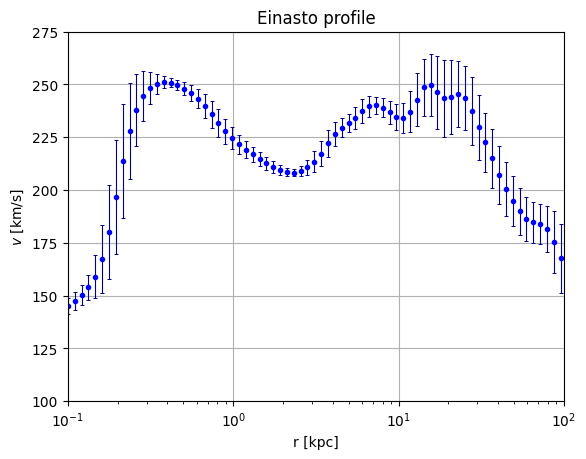

In [20]:
import numpy as np
vtotal= np.sqrt ([ v_bulge(r ,1.775 , 593000000)**2 + v_disk(r ,9.130, 578000000)**2 + v_halo(r , 248660, 8.745, 0.041)**2 for r in rs ]) 
plt.plot(rs , vtotal, color='green',linestyle='--')
plt.errorbar(xl, yl, el, fmt='.b', ecolor='darkblue',elinewidth=0.8, capsize=1.5, capthick=0.7)
# plt.title('Milky Way')
xl= np.array(xl)
yl = np.array(yl)
el = np.array(el)
plt.xscale('log')
plt.xlabel("r [kpc]")
plt.ylabel("$v$ [km/s]")
plt.xlim(0.1, 100)
plt.yticks(range(100, 276, 25))
plt.grid()
plt.title('Einasto profile')
plt.show()

/tmp/ipykernel_22481/2064457011.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data= pd.read_csv("mw_r_v_sd.2", delim_whitespace=True, header=None, names=['r', 'v', 'std'])


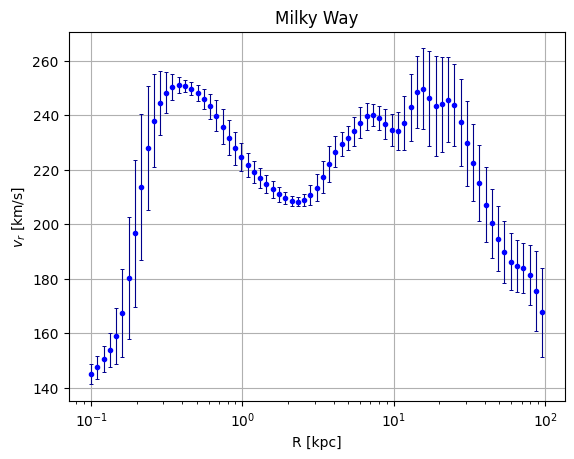

In [6]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
data= pd.read_csv("mw_r_v_sd.2", delim_whitespace=True, header=None, names=['r', 'v', 'std'])
xl=data['r']
yl=data['v']
el=data['std']
plt.errorbar(xl, yl, el, fmt='.b', ecolor='darkblue',elinewidth=0.8, capsize=1.5, capthick=0.7)
plt.xlabel('R [kpc]')
plt.ylabel('$v_r$ [km/s]')
plt.title('Milky Way')
xl= np.array(xl)
yl = np.array(yl)
el = np.array(el)
plt.xscale('log')                   # important line
plt.grid()
plt.show()

In [7]:
def ln_likeli(xl ,yl,el ,a_b, sig_b, a_d, sig_d, rho, h, n):
    vbulge = np.array([v_bulge(x, a_b, sig_b) for x in xl])
    vdisk  = np.array([v_disk(x, a_d, sig_d) for x in xl])
    vhalo  = np.array([v_halo(x, rho, h, n) for x in xl])

    vth = np.sqrt(vbulge**2 +vdisk**2 + vhalo**2)
    chi2 = np.sum((yl - vth)**2 / el**2)
    return -0.5 * chi2

In [ ]:
# def ln_likeli_nfw(xl ,yl,el ,a_b, sig_b, a_d, sig_d, rho, h):
#     vbulge = np.array([v_bulge(x, a_b, sig_b) for x in xl])
#     fdisk  = np.array([fv_d(x, a_d, sig_d) for x in xl])
#     fhalo  = np.array([fv_h_nfw(x, rho, h) for x in xl])

#     vth = np.sqrt(vbulge**2 + fdisk + fhalo)
#     chi2 = np.sum((yl - vth)**2 / el**2)
#     return -0.5 * chi2


In [8]:
def ln_prior(theta):
      a_b, sig_b, a_d, sig_d, rho, h, n = theta
      if not (1.7 < a_b < 1.9):
          return -np.inf
      if not (0.54 < sig_b < 0.64):
          return -np.inf
      if not ( 8.5 < a_d < 10 ):
          return -np.inf
      if not (0.52 < sig_d < 0.64):
          return -np.inf
      if not (5 < rho < 50):
          return -np.inf
      if not ( -10< h < 30):
         return -np.inf
      if not ( -0.4< n< 1):
         return -np.inf  
      return 0.0

In [9]:
def ln_post(theta, xl, yl, el):
    a_b, sig_b, a_d, sig_d, rho, h, n = theta
    lp = ln_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = ln_likeli(xl, yl, el, a_b, sig_b, a_d, sig_d, rho, h, n)
    if not np.isfinite(ll):
        return -np.inf
    return lp + ll

In [10]:
# FOR CHECKING
import time
init_guess = [1.8, 0.59, 9.25, 0.59, 27.5, 10, 0.3]  # Rough center of prior a_b, sig_b, a_d, sig_d, rho, h
for _ in range(20):
    theta = init_guess + np.random.normal(0, [0.01, 0.005, 0.075, 0.006, 2.25, 2, 0.08])
    t0 = time.time()
    val = ln_post(theta, xl, yl, el)
    print(f"ln_posterior = {val:.2f}, Time = {time.time() - t0:.3f} sec")

ln_posterior = -87159.18, Time = 1.271 sec
ln_posterior = -87161.85, Time = 1.311 sec
ln_posterior = -87157.43, Time = 1.488 sec
ln_posterior = -87160.73, Time = 1.318 sec
ln_posterior = -87157.59, Time = 1.432 sec
ln_posterior = -87163.67, Time = 1.303 sec
ln_posterior = -87160.75, Time = 1.330 sec
ln_posterior = -87157.70, Time = 1.380 sec
ln_posterior = -87159.44, Time = 1.406 sec
ln_posterior = -87162.54, Time = 1.383 sec
ln_posterior = -87162.22, Time = 1.345 sec
ln_posterior = -87157.51, Time = 1.495 sec
ln_posterior = -87161.68, Time = 1.441 sec
ln_posterior = -87160.52, Time = 1.646 sec
ln_posterior = -87161.31, Time = 1.497 sec
ln_posterior = -87161.02, Time = 1.373 sec
ln_posterior = -87160.83, Time = 1.494 sec
ln_posterior = -87159.69, Time = 1.362 sec
ln_posterior = -87164.11, Time = 1.404 sec
ln_posterior = -87158.14, Time = 1.439 sec


In [11]:
import emcee
import numpy as np                                    # np.random.normal(0, [0.01, 0.005, 0.075, 0.006, 2.25, 2, 0.08]
import pandas as pd
# ---- MCMC SETUP ----
ndim = 7           # No. of parameters
nwalkers = 40      # Number of independent chains ("walkers")
nsteps = 3000      # Steps each walker takes
burnin = 200      # Discard these initial steps (they're still "warming up")

# ---- INITIAL GUESS FOR WALKERS ----

np.random.seed(21)
init_guess = [1.8, 0.59, 9.25, 0.59, 27.5, 10, 0.3]  # Rough center of prior a_b, sig_b, a_d, sig_d, rho, h
pos =  np.array([init_guess] * nwalkers) + np.random.normal(0, [0.01, 0.005, 0.075, 0.006, 2.25, 2, 0.08], (nwalkers, ndim))

In [1]:
import os
os.cpu_count()

12

In [12]:
import multiprocessing
if __name__ == '__main__':
    with multiprocessing.Pool(processes=10) as pool:
        sampler = emcee.EnsembleSampler(
            nwalkers,
            ndim,
            ln_post,
            args=(xl, yl, el),
            pool=pool
        )
        sampler.run_mcmc(pos, nsteps, progress=True)

    flat_samples = sampler.get_chain(discard=burnin, flat=True)
    print("Shape of samples:", flat_samples.shape)

  0%|          | 0/3000 [00:00<?, ?it/s]/tmp/ipykernel_22481/2627928562.py:2: RuntimeWarning: overflow encountered in scalar power
  mass= 4* np.pi* rho_0* n* h**3* gamma(3*n) * gammainc(3*n, (r/h)**(1/n))
  0%|          | 6/3000 [00:55<7:42:34,  9.27s/it]/tmp/ipykernel_22481/2627928562.py:2: RuntimeWarning: invalid value encountered in scalar power
  mass= 4* np.pi* rho_0* n* h**3* gamma(3*n) * gammainc(3*n, (r/h)**(1/n))
  0%|          | 7/3000 [01:03<7:22:00,  8.86s/it]/tmp/ipykernel_22481/2627928562.py:2: RuntimeWarning: invalid value encountered in scalar power
  mass= 4* np.pi* rho_0* n* h**3* gamma(3*n) * gammainc(3*n, (r/h)**(1/n))
  0%|          | 8/3000 [01:11<7:11:50,  8.66s/it]/tmp/ipykernel_22481/2627928562.py:2: RuntimeWarning: invalid value encountered in scalar power
  mass= 4* np.pi* rho_0* n* h**3* gamma(3*n) * gammainc(3*n, (r/h)**(1/n))
/tmp/ipykernel_22481/2627928562.py:2: RuntimeWarning: invalid value encountered in scalar power
  mass= 4* np.pi* rho_0* n* h**3* g

Shape of samples: (112000, 7)


In [ ]:
ab_samp = flat_samples[:, 0]  # All sampled values of 
sb_samp = flat_samples[:, 1]  # All sampled values of 
ad_samp = flat_samples[:, 2]  # All sampled values of a_d
sd_samp = flat_samples[:, 3]  # All sampled values of sigma_d
rho_samp= flat_samples[:, 4]  # All sampled values of rho_0
h_samp= flat_samples[:, 5]    # All sampled values of h
n_samp= flat_samples[:, 6]    # All sampled values of n
# ---- SUMMARIZE RESULTS ----
print(f"a_b = {np.mean(ab_samp):.3f} ± {np.std(ab_samp):.3f}")
print(f"sigma_b = {np.mean(sb_samp):.3f} ± {np.std(sb_samp):.3f}")
print(f"a_d = {np.mean(ad_samp):.3f} ± {np.std(ad_samp):.3f}")
print(f"sigma_d = {np.mean(sd_samp):.3f} ± {np.std(sd_samp):.3f}")
print(f"rho_0 = {np.mean(rho_samp):.3f} ± {np.std(rho_samp):.3f}")
print(f"h = {np.mean(h_samp):.3f} ± {np.std(h_samp):.3f}")
print(f"h = {np.mean(n_samp):.3f} ± {np.std(n_samp):.3f}")

a_b = 1.799 ± 0.057
sigma_b = 0.589 ± 0.028
a_d = 9.264 ± 0.442
sigma_d = 0.580 ± 0.036
rho_0 = 48.513 ± 1.504
h = 27.946 ± 1.938
h = 0.557 ± 0.290


In [ ]:
plt.figure()
for i in range(nwalkers):
    plt.plot(sampler.get_chain()[:, i, 0], alpha=0.4)
plt.xlabel("Step")
plt.ylabel("a_b")
plt.title("Raw chain (not flattened)")
plt.show()

In [15]:
print(flat_samples.shape)
print("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction))
for _ in range(10):
    test = init_guess + np.random.normal(0, 1, 7)
    print(test, ln_post(test, xl, yl, el))


(112000, 7)
Mean acceptance fraction: 0.2293416666666667
[ 2.19108999  2.45685976  7.80659527 -0.30434464 27.21397395 10.9043462
  1.31091386] -inf
[ 1.05147562  1.42256144  9.17350577  1.60244525 27.57543409 10.54942243
  0.32074964] -inf
[ 0.9264008  -0.34087718  9.74346695 -0.11819542 26.5114147   9.78663436
  0.77162557] -inf
[ 2.45090159 -0.10402378  9.09938822  1.15532089 26.85871182 10.97010656
  0.46348463] -inf
[ 0.80521178  1.22776919  8.96583242  2.1717269  27.35011259 11.53322682
  2.59573877] -inf
[ 2.40678291  1.13564765  8.91532454  0.74198349 28.34313803 12.043847
  1.57370545] -inf
[ 1.03114477  1.91288864  8.58871513  2.45279706 28.74979554 10.54551248
 -0.88166567] -inf
[ 2.46755996 -0.04779345  8.53359012  0.49559402 25.90038696 10.08955096
  0.68071496] -inf
[ 2.68887874e+00 -6.64032906e-03  8.76662826e+00  1.94032417e+00
  2.87481016e+01  8.32301202e+00  8.60238158e-01] -inf
[ 2.80525467 -0.10565254 10.23891775  0.34091201 27.11835956  8.77630426
  1.64603812] -in

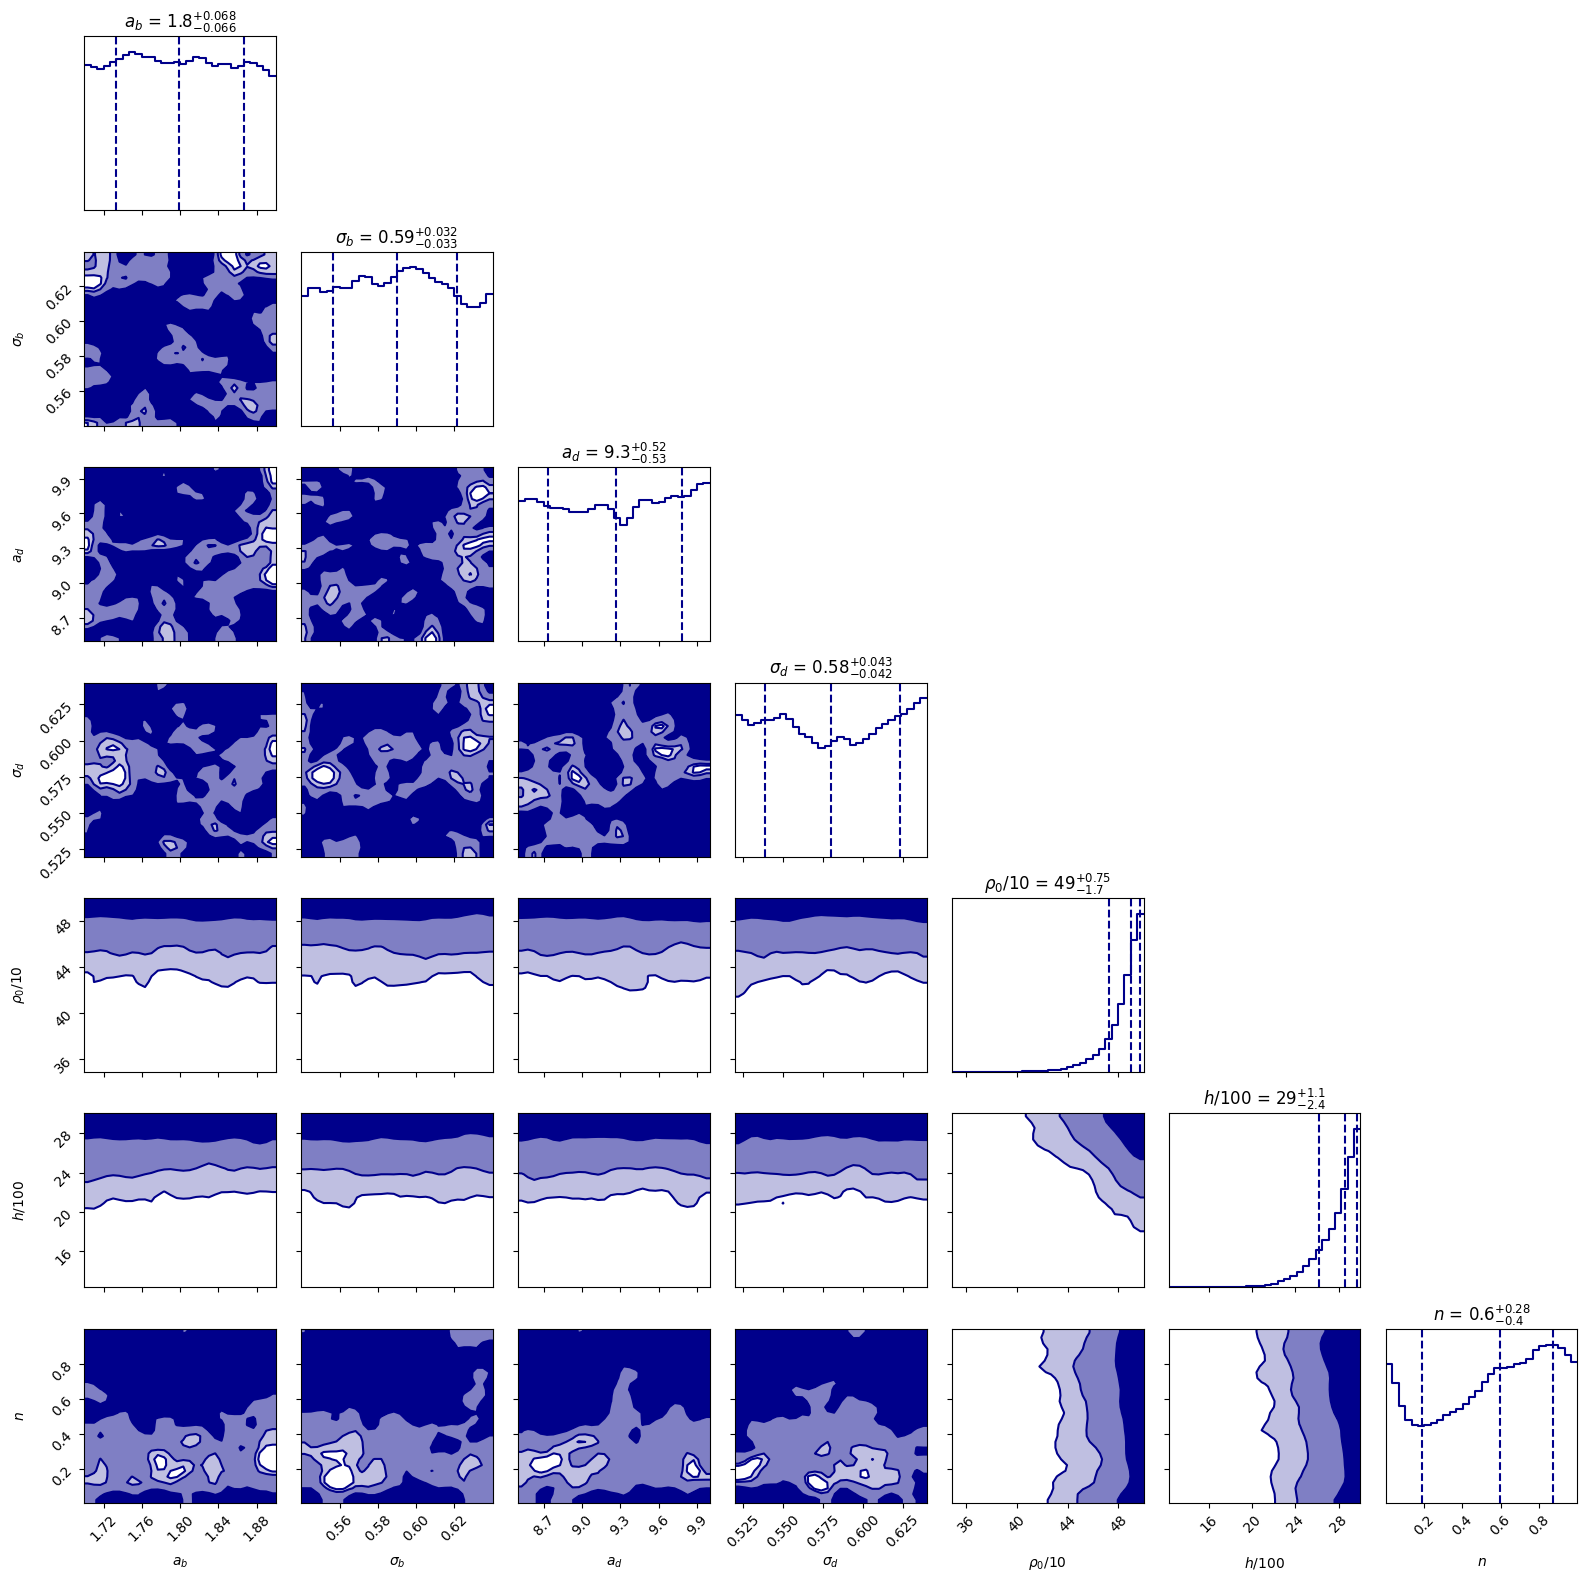

In [ ]:
import corner

corner.corner(
    flat_samples,                                                                              # samples_scaled, in place of flat samples?
    labels=["$a_b$", "$\\sigma_b$", "$a_d$", "$\\sigma_d$", "$\\rho_0/10$", "$h/100$","$n$"],
    bins=30,
    color="darkblue",
    quantiles=[0.16, 0.5, 0.84],
    plot_contours=True,
    fill_contours=True,
    levels=(0.68, 0.95, 0.99),
    plot_datapoints=False,         # cleaner plots
    smooth=1.0, smooth1d=1.0,
    title_fmt=".2g",
    show_titles=True
)
plt.tight_layout()
plt.show()

In [ ]:
import corner 
# fig = corner.corner(flat_samples,bins=50,labels=["$a_b$","$sigma_b$","$a_d$" , "$sig_d$", "$rho_0$", "h"],
#                     color="darkblue",
#                     quantiles=[0.16, 0.5, 0.84],                     # default value
#                     plot_contours=True,
#                     fill_contours=True,
#                     levels=(0.68,0.95,0.99,),
#                     plot_datapoints=True,
#                     smooth=True, smooth1d=False,
#                     title_fmt=".2g",                    # .2f  or  .2g
#                     show_titles=True,
#                     )

labels = [r"$a_b$", r"$\sigma_b$", r"$a_d$", r"$\sigma_d$", r"$\rho_0$", r"$h$"]

# Optional: scaling if some values are very skewed (e.g., rho0 or h)
samples_scaled = np.copy(flat_samples)
samples_scaled[:, 4] /= 10     # rho_0 → 10^0 scale
samples_scaled[:, 5] /= 100    # h → 10^2 scale

scaled_labels = [r"$a_b$", r"$\sigma_b$", r"$a_d$", r"$\sigma_d$", r"$\rho_0/10$", r"$h/100$"]

fig = corner.corner(
    samples_scaled,
    labels=scaled_labels,
    bins=40,
    color="darkblue",
    quantiles=[0.16, 0.5, 0.84],
    plot_contours=True,
    fill_contours=True,
    levels=(0.68, 0.95, 0.99),
    plot_datapoints=False,
    smooth=1.0,
    smooth1d=1.0,
    title_fmt=".2f",
    show_titles=True
)
plt.show()

In [ ]:
import corner
import numpy as np

thin = 5
samples_thinned = flat_samples[::thin]

fig = corner.corner(samples_thinned,
    bins=30,
    labels=["$a_b$", "$\\sigma_b$", "$a_d$", "$\\sigma_d$", "$\\rho_0$", "$h$"],
    color="darkblue",
    quantiles=[0.16, 0.5, 0.84],
    plot_contours=True,
    fill_contours=True,
    levels=(0.68, 0.95, 0.99),
    plot_datapoints=True,
    smooth=False, smooth1d=False,    # <-- try turning these off
    title_fmt=".2g",
    show_titles=True
)
